                                                                                            
                                                                                 Abhishek Laxman Joshi - CB.EN.P2DSC21033
                                                                                          

1. Construct a sparse and a dense matrices of size 1000x1000

A sparse matrix is a matrix in which most elements are zeroes.
A dense matrix is one which high number of edges.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
#size is 1000*1000
#create a simple matrix in Numpy.
A = np.random.uniform(size=(1000,1000))
#Then we need to zero out a majority of the matrix elements, making it sparse.
A[A < 0.6] = 0
#store standard matrix X as a compressed sparse row matrix
A_csr = sparse.csr_matrix(A) # ROW MAJOR ODRDER
# A_list = list(A_csr)
# print(A_list)
# convert a sparse Scipy matrix representation back to Numpy multidimensional array.
B=A_csr.todense()
print("compressed sparse row matrix \n")
print(A_csr)
print("compressed sparse row matrix converted to array \n")
print(A_csr.toarray())
sp = A_csr.toarray()
print("print dense matrix \n")
print(B)
#or I can do it column wise
A_csc = sparse.csc_matrix(A) # COLUMN MAJOR ORDER
#print("compressed sparse matrix column matrix")
#print(A_csc)
#print("Converted to array")
#print(A_csc.toarray())
#plt.spy(A_csr, markersize = 1)

compressed sparse row matrix 

  (0, 2)	0.9746613117407589
  (0, 4)	0.7471899528424176
  (0, 7)	0.9981773655205337
  (0, 10)	0.8571646059000492
  (0, 11)	0.8715730718095563
  (0, 15)	0.8695803267741399
  (0, 18)	0.7762187938627502
  (0, 25)	0.6251391138409724
  (0, 27)	0.9908727652551601
  (0, 32)	0.8381195256290308
  (0, 33)	0.7376105847730042
  (0, 34)	0.9061292068765903
  (0, 37)	0.8613692865076134
  (0, 39)	0.967659090761908
  (0, 40)	0.6730172218995903
  (0, 45)	0.6352294930747365
  (0, 50)	0.924285496136243
  (0, 51)	0.842701117065534
  (0, 52)	0.8518973817466428
  (0, 53)	0.8435748800371844
  (0, 55)	0.8716099167022294
  (0, 60)	0.9119993271712845
  (0, 66)	0.9389390662659504
  (0, 75)	0.8370158447518545
  (0, 80)	0.819121237654223
  :	:
  (999, 934)	0.8380926758901501
  (999, 935)	0.9668825799805711
  (999, 941)	0.8204059207804418
  (999, 942)	0.8721015374587839
  (999, 943)	0.7461862429747181
  (999, 945)	0.9690809679733675
  (999, 946)	0.7056784426056858
  (999, 952)	0.896400

Q2) Identify the Data structure to store given sparse matrix


Data structure to be used for given sparse matrix will be Adjacency list

Q3) Justify the selection of your DS.


If the graph is dense (number of edges is very high) then we go with the Adj matrix because E=O(V^2). E denotes edges and V denotes vertices.
That is if the graph is almost complete, we use adj. matrix because most cells will be used.
But for sparse( very few edges) its E=O(V). Therefore we go with Adjacency list.
Lets take an example:
In Facebook, there are million users. Then if I use Adj. Matrix, I will have to use million by million dimension matrix that is every node(Profile) will have million entries. But every person will not know every person. Even if a person has 5000 friends,most of the entries will be zero. A lot of space is wasted.
Thus we use adjacency list.
The number of elements present in list will be 2E in case of undirected else 'E' in case of directed.
thus for adj matrix its O(V^2)
for adj list its V+2E that is O(V+2E)

In [2]:
# importing necessary functions
import numpy as np
from scipy.sparse import isspmatrix
from numpy import count_nonzero

# Creating sparse matrix

# Position of non zero elements
row = np.array([0,0,1,1,1,1,2,2,3,3,3])
col = np.array([1,4,0,2,3,4,1,3,1,4,2])
    
# Creating sparse matrix of size 1000 X 1000
sparseMatrix=np.zeros([1000,1000]) # initially all ten lakh elements will be zero
for i,j in zip(row,col): #zip is used for one to one correspondance
  sparseMatrix[i][j]=1
print(sparseMatrix)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Q 4. Write a program to implement the data structure (free to use any programming language)

In [3]:
from collections import defaultdict
import sys

def convert(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList

#Create an array of lists and traverse the adjacency matrix or the sparse matrix
#If for any cell (i, j) in the matrix a[i][j] = 1, it means there is an edge from i to j, 
#so insert j in the list at i-th position in the array of lists.
a = sparseMatrix # adjacency matrix
AdjList = convert(a)
print("Adjacency List:")

# print the adjacency list
for i in AdjList:
    print(i, end ="")
    for j in AdjList[i]:
        print(" -> {}".format(j), end ="")
    print()
print('**************************************')
print(AdjList)

Adjacency List:
0 -> 1 -> 4
1 -> 0 -> 2 -> 3 -> 4
2 -> 1 -> 3
3 -> 1 -> 2 -> 4
**************************************
defaultdict(<class 'list'>, {0: [1, 4], 1: [0, 2, 3, 4], 2: [1, 3], 3: [1, 2, 4]})


5. Write a function to visualize the sparse matrix in a graphical format (free to use any programming language)



[(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (4, 3), (2, 3)]


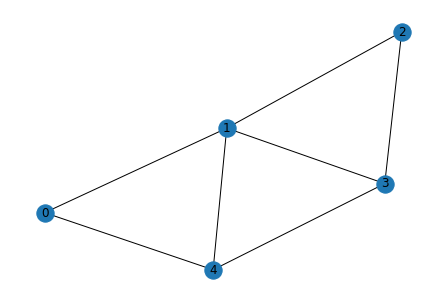

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

graph = AdjList
#stores all the edges which will constitute the graph
edge = [] 

# Creating edges
for i in graph:
  for k in graph[i]:
    tup = int(i), int(k)
    edge.append(tup) # append the element to the empty list created

g = nx.Graph() # g si the object of class Graph

# Adding edges to the graph
for e in edge:
  g.add_edge(e[0], e[1])
print(g.edges)

nx.draw(g, with_labels = True) # to draw the graph nx.draw is used
#plt.show()